# Embedding Analysis

This notebook explores the HCPCS embeddings that were learned using skip-gram and continuous bag of words models.

We first take a sample of HCPCS codes and list nearest neighbors in embedding space. If our embedding methods worked, we expect neighboring HCPCS codes to be related.

Next, we use t-SNE to visualizle the embedding spaces. We explore clusters of HCPCS codes and compare their HCPCS descriptions. We expect codes same-cluster codes to be related.

In [54]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Load HCPCS Descriptions

In [32]:
# load mapping of HCPCS ID -> HCPCS Description
with open('./data/hcpcs_descriptions.pickle', 'rb') as fin:
    hcpcs_desc = pickle.load(fin)
    
unique_hcpcs = list(hcpcs_desc.keys())
hcpcs_count = len(unique_hcpcs)
print(f'{hcpcs_count} unique HCPCS codes')

7028 unique HCPCS codes


In [75]:
random_codes = np.random.choice(unique_hcpcs, size=5)

def printcode(code):
    print(f'{code}: {hcpcs_desc[code]}')
    
print('Random HCPCS codes for previewing nearest neighbors:\n')
for code in random_codes:
    printcode(code)

Random HCPCS codes for previewing nearest neighbors:

11000: Removal of inflamed or infected skin
87075: Bacterial culture
85421: Plasminogen antigenic (factor inhibitor) measurement
77031: Radiological supervision and interpretation of imaging guidance for breast biopsy or insertion of needle
78102: Imaging of bone marrow limited area


## Skip-gram Nearest Neighbors

In [38]:
embeddings = KeyedVectors.load('model-skipgram/saved-models/embeddings-e300-w5-i100-t080120054147.kv')

In [39]:
for code in random_codes:
    printcode(code)
    neighbors = embeddings.similar_by_word(code, topn=5)
    for neighbor, _ in neighbors:
        printcode(neighbor)
    print('\n')

85540: White blood cell alkaline phosphatase (enzyme) measurement with cell count
88289: Chromosome analysis for genetic defects
82380: Carotene level
87337: Detection test forentamoeba histolytica group (parasite)
80195: Sirolimus level
88385: Evaluation of genetic test


63077: Removal of middle spine disc and release of spinal cord or nerves
63078: Removal of middle spine disc and release of spinal cord or nerves
49427: Injection for X-ray study of shunt from jugular vein to abdominal cavity
63277: Removal or biopsy of lower spine bone growth
63050: Reconstruction of bone around spinal canal with release of spinal cord
63001: Partial removal of bone with release of spinal cord or spinal nerves


50240: Partial removal of kidney
50230: Removal of kidney, lymph nodes, and blood clot from major vein (vena cava) with partial removal of urinary duct (ureter)
51597: Removal of bladder, urinary ducts (ureters), uterus, bowel, and rectum, with creation of urinary ostomy
51590: Removal of bl

## CBOW Nearest Neighbors

In [40]:
embeddings = KeyedVectors.load('model-cbow/saved-models/embeddings-e300-w5-i200-t080120054346.kv')

In [41]:
for code in random_codes:
    printcode(code)
    neighbors = embeddings.similar_by_word(code, topn=5)
    for neighbor, _ in neighbors:
        printcode(neighbor)
    print('\n')

85540: White blood cell alkaline phosphatase (enzyme) measurement with cell count
86022: Antibody identification test for platelet antibodies
87900: Infectious agent drug susceptibility analysis
85598: Phospholipid test
87904: Analysis test for HIV-1 virus
85246: Clotting factor VIII (VW factor) antigen


63077: Removal of middle spine disc and release of spinal cord or nerves
22114: Partial removal of spine bone and growth at lower spinal column
63272: Removal of lower spine bone and growth
22319: Open treatment of broken and/or dislocated upper spine bones with bone graft
22856: Insertion of artificial spine disc
22595: Fusion of spine bones at skull base, posterior approach


50240: Partial removal of kidney
50230: Removal of kidney, lymph nodes, and blood clot from major vein (vena cava) with partial removal of urinary duct (ureter)
51590: Removal of bladder with transplantation of urinary ducts (ureters) and creation of urinary ostomy
55840: Removal of prostate gland
38780: Remova

## Skip-gram tSNE Visualization

In [71]:
sample_size = 200

In [89]:
def tsne_plot(embeddings, samplesize):
    # take sample
    labels = []
    tokens = []
    for word in embeddings.vocab:
        tokens.append(embeddings[word])
        labels.append(word)
    sample_indices = np.random.choice(np.arange(0, len(labels), 1), sample_size)
    labels = np.array(labels)[sample_indices]
    tokens = np.array(tokens)[sample_indices]

    # reduce dimensions
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=42)
    new_values = tsne_model.fit_transform(tokens)
    
    # plot projection with labels
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

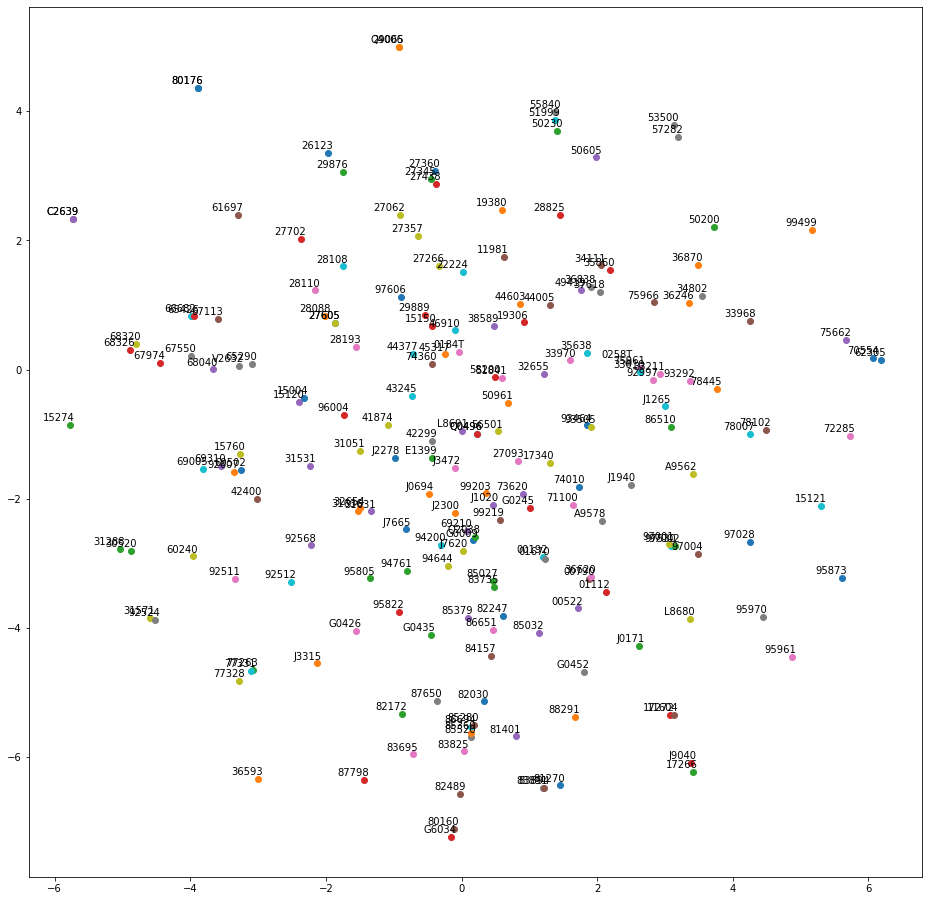

CPU times: user 6.78 s, sys: 5.46 s, total: 12.2 s
Wall time: 26.3 s


In [73]:
%%time

embeddings = KeyedVectors.load('model-skipgram/saved-models/embeddings-e300-w5-i100-t080120054147.kv')
tsne_plot(embeddings)

In [87]:
printcode('55840')
printcode('51999')
printcode('50230')

55840: Removal of prostate gland
51999: Procedure of the bladder using an endoscope
50230: Removal of kidney, lymph nodes, and blood clot from major vein (vena cava) with partial removal of urinary duct (ureter)


In [81]:
printcode('27702')
printcode('28108')

27702: Repair of ankle joint with prosthesis
28108: Removal or scraping of bone cyst or growth of toes


In [83]:
printcode('50200')
printcode('36870')
printcode('34802')
printcode('75966')

50200: Needle biopsy of kidney
36870: Catheter removal of blood clot from dialysis graft
34802: Repair of bulging (aneurysm) or tear in abdominal aorta
75966: Radiological supervision and interpretation of opening narrowed artery of an organ or kidney procedure


In [84]:
printcode('27360')
printcode('27345')
printcode('27062')
printcode('27357')

27360: Surgical removal of dead or infected tissue of thigh bone
27345: Removal of cyst of membrane covering behind knee joint
27062: Removal of fluid-filled sac (bursa) or calcium deposit of pelvis
27357: Removal or scraping of cyst or growth of thigh bone with patient-derived bone graft


## CBOW tSNE Visualization

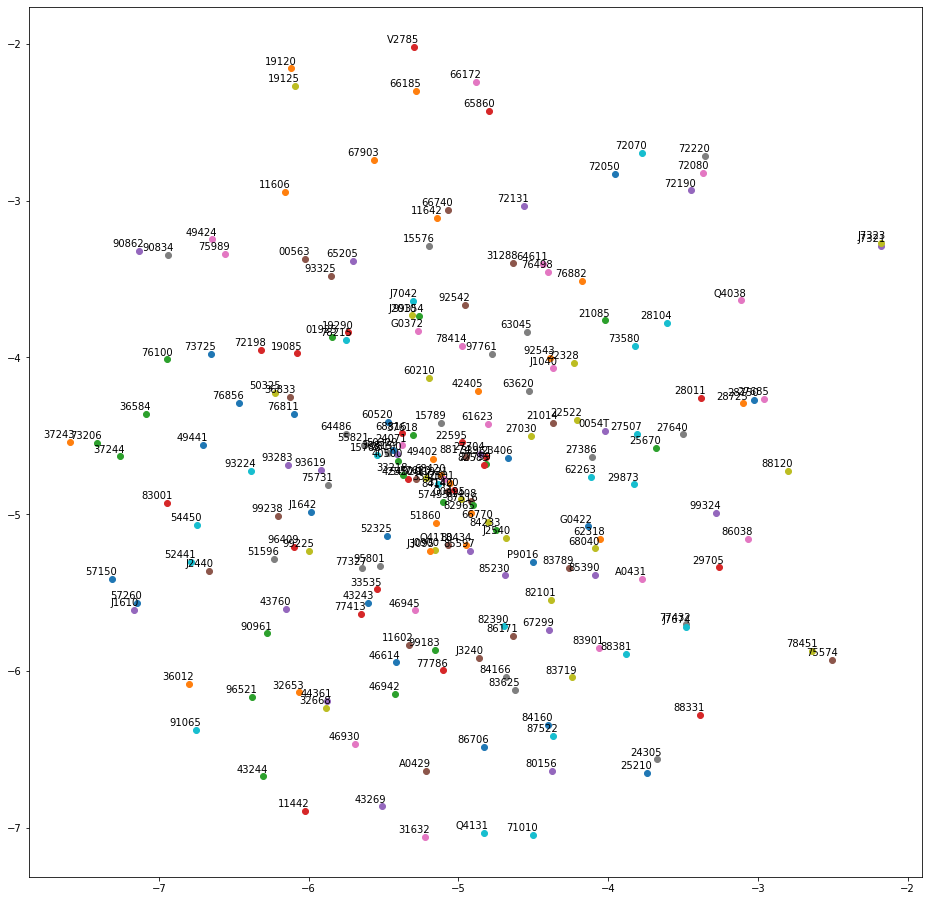

CPU times: user 14.8 s, sys: 5.87 s, total: 20.7 s
Wall time: 26.8 s


In [91]:
%%time

embeddings = KeyedVectors.load('model-cbow/saved-models/embeddings-e300-w5-i200-t080120054346.kv')
tsne_plot(embeddings, sample_size)

In [96]:
printcode('32653')
printcode('44361')
printcode('32668')

32653: Removal of foreign body from lining of chest cavity using an endoscope
44361: Biopsy of small bowel using an endoscope
32668: Partial removal of lung tissue using an endoscope


In [98]:
printcode('24305')
printcode('25210')

24305: Lengthening of tendon of upper arm or elbow
25210: Removal of wrist bone


In [99]:
printcode('78451')
printcode('75574')

78451: Nuclear medicine study of vessels of heart using drugs or exercise single study
75574: CT scan of heart blood vessels and grafts with contrast dye


In [100]:
printcode('72070')
printcode('72050')
printcode('72220')
printcode('72080')
printcode('72190')

72070: X-ray of middle spine, 3 views
72050: X-ray of upper spine, minimum of 4 views
72220: X-ray of pelvis, minimum of 2 views
72080: X-ray of middle and lower spine, 2 views
72190: X-ray of pelvis, minimum of 3 views


In [101]:
printcode('49424')
printcode('75989')

49424: Injection through abdominal cavity catheter for X-ray study
75989: Radiological supervision and interpretation of placement of catheter with drainage procedure


In [103]:
printcode('00563')
printcode('93325')

00563: Anesthesia for procedure on heart and great blood vessels on heart-lung machine
93325: Doppler ultrasound study of color-directed heart blood flow, rate, and valve function
